In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [2]:
boston = datasets.load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['target'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


CRIM: Per capita crime rate by town<br/>
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft<br/>
INDUS: Proportion of non-retail business acres per town<br/>
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)<br/>
NOX: Nitric oxide concentration (parts per 10 million)<br/>
RM: Average number of rooms per dwelling<br/>
AGE: Proportion of owner-occupied units built prior to 1940<br/>
DIS: Weighted distances to five Boston employment centers<br/>
RAD: Index of accessibility to radial highways<br/>
TAX: Full-value property tax rate per 10,000 dollar<br/>
PTRATIO: Pupil-teacher ratio by town<br/>
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town<br/>
LSTAT: Percentage of lower status of the population<br/>
MEDV: Median value of owner-occupied homes in $1000s<br/>

In [4]:
df.shape

(506, 14)

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.isna().sum()
# no missing values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [7]:
df.isnull().values.any()

False

Text(0, 0.5, 'Median value of owner-occupied homes in $1000s')

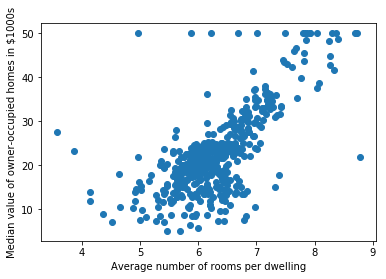

In [8]:
X, y = df.RM, boston.target
plt.scatter(X, y)
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes in $1000s')
# positive correlation

In [9]:
boston_X = df[['RM']]
boston_y = df[['target']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_y, test_size=0.2, random_state=42)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 1), (102, 1), (404, 1), (102, 1))

In [12]:
regr = LinearRegression()
regr.fit(X_train, y_train)   # the training data and training label
y_pred = regr.predict(X_test)   # make predictions using the testing set

# Regression metrics
print('Coefficients: \n', regr.coef_)
print(f"Mean squared error:{mean_squared_error(y_test, y_pred): .2f}")
print(f"Root Mean squared error: {sqrt(mean_squared_error(y_test, y_pred)) :.2f}")
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

Coefficients: 
 [[9.34830141]]
Mean squared error: 46.14
Root Mean squared error: 6.79
Variance score: 0.37


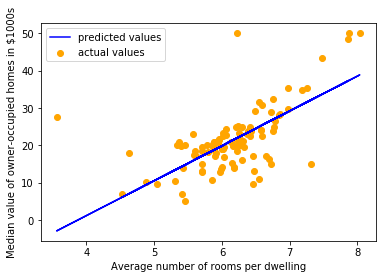

In [13]:
plt.scatter(X_test, y_test, color='orange', label='actual values')   # testing data and testing label
plt.plot(X_test, y_pred, color='blue', label='predicted values')   # training label and predicted values

plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes in $1000s')

plt.legend()

In [14]:
regr.intercept_

array([-36.2463189])

fit_intercept=False sets the y-intercept to 0. If fit_intercept=True, the y-intercept will be determined by the line of best fit.

Coefficients: 
 [[3.68072738]]
Mean squared error: 54.93
Root Mean squared error: 7.41
Variance score: 0.25


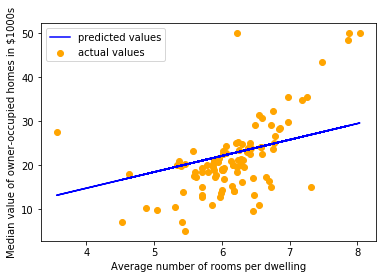

In [15]:
regr = LinearRegression(fit_intercept=False)   
# whether to calculate the intercept for this model. 
# If set to False, no intercept will be used in calculations (e.g. data is expected to be already centered).
regr.fit(X_train, y_train)   
y_pred = regr.predict(X_test)

print('Coefficients: \n', regr.coef_)
print(f"Mean squared error:{mean_squared_error(y_test, y_pred): .2f}")
print(f"Root Mean squared error: {sqrt(mean_squared_error(y_test, y_pred)) :.2f}")
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

plt.scatter(X_test, y_test, color='orange', label='actual values')   # testing data and testing label
plt.plot(X_test, y_pred, color='blue', label='predicted values')   # training label and predicted values

plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes in $1000s')

plt.legend()

In [16]:
regr.intercept_

0.0

In [17]:
import numpy as np
from scipy import stats

#define the standard deviation
std_dev = 3

#zscore are the data values standardized by mean and standard deviation of input array df
df_new = df[(np.abs(stats.zscore(df)) < float(std_dev)).all(axis=1)]

In [18]:
df_new.shape

(415, 14)

In [19]:
# outliers removed
X = pd.DataFrame(df_new[['RM']])
y = pd.DataFrame(df_new[['target']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((332, 1), (83, 1), (332, 1), (83, 1))

Coefficients: 
 [[9.70607908]]
Mean squared error: 18.88
Root Mean squared error: 4.35
Variance score: 0.60


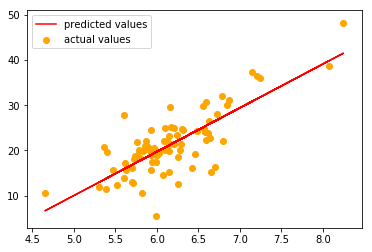

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print(f"Mean squared error:{mean_squared_error(y_test, y_pred): .2f}")
print(f"Root Mean squared error: {sqrt(mean_squared_error(y_test, y_pred)) :.2f}")
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

plt.plot(X_test, y_pred, color = 'red', label = 'predicted values')
plt.scatter(X_test, y_test, color = 'orange', label = 'actual values')

plt.legend()

In [22]:
#define the standard deviation
std_dev = 2

#zscore are the data values standardized by mean and standard deviation of input array df
df_new = df[(np.abs(stats.zscore(df)) < float(std_dev)).all(axis=1)]

In [23]:
df_new.shape

(305, 14)

Coefficients: 
 [[7.28731283]]
Mean squared error: 20.69
Root Mean squared error: 4.55
Variance score: 0.41


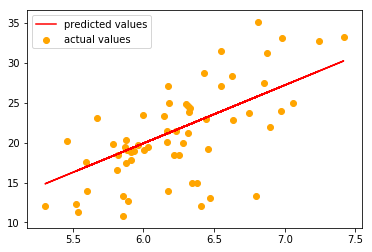

In [24]:
# outliers removed
X = pd.DataFrame(df_new[['RM']])
y = pd.DataFrame(df_new[['target']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print(f"Mean squared error:{mean_squared_error(y_test, y_pred): .2f}")
print(f"Root Mean squared error: {sqrt(mean_squared_error(y_test, y_pred)) :.2f}")
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

plt.plot(X_test, y_pred, color = 'red', label = 'predicted values')
plt.scatter(X_test, y_test, color = 'orange', label = 'actual values')

plt.legend()

In [25]:
#define the standard deviation
std_dev = 1.5

#zscore are the data values standardized by mean and standard deviation of input array df
df_new = df[(np.abs(stats.zscore(df)) < float(std_dev)).all(axis=1)]

In [26]:
df_new.shape

(160, 14)

Coefficients: 
 [[8.10774013]]
Mean squared error: 9.51
Root Mean squared error: 3.08
Variance score: 0.54


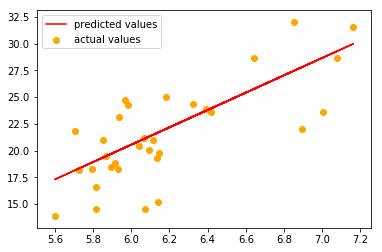

In [27]:
# outliers removed
X = pd.DataFrame(df_new[['RM']])
y = pd.DataFrame(df_new[['target']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print(f"Mean squared error:{mean_squared_error(y_test, y_pred): .2f}")
print(f"Root Mean squared error: {sqrt(mean_squared_error(y_test, y_pred)) :.2f}")
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

plt.plot(X_test, y_pred, color = 'red', label = 'predicted values')
plt.scatter(X_test, y_test, color = 'orange', label = 'actual values')

plt.legend()